In [1]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import pandas as pd
import socket
import matplotlib.pyplot as plt

### Do the Arial 
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the default
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
elif socket_name.startswith("Harald-Laptop"):
    print("Harald's new laptop detected!")
    path = "/home/hringbauer/git/HAPSBURG/" 
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./package/")  # Go to the hapsburg package directory

from hapsburg.PackagesSupport.pp_individual_roh_csvs import post_process_roh_df, combine_ROH_df, calc_average_roh
from hapsburg.figures.plot_bars import plot_panel_row, prepare_dfs_plot, create_cousins_roh

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


# Do Barplot of various small Ne

In [11]:
### Load and split up the data
nes = [500, 1000, 2000, 4000]
loadpath = "./Simulated/msprime/fixed_Ne_all_rec/combined_roh.tsv"
df1 = pd.read_csv(loadpath, sep="\t")
df_all = [df1[df1["pop"]==f"2Ne_{ne}"] for ne in nes]

df_samples = [df.sample(n=40).sort_values(by="sum_roh>4", ascending=False) 
                          for df in df_all]

# If one wants to plot averages
df_averages = [calc_average_roh(df) for df in df_all]
df_averages = pd.concat(df_averages)

df_plots = df_samples + [df_averages]

#df_averages["clst"]

# If you want to have averages, comment out
#df_plots = [None]*(len(df_samples)+len(df_averages))
#df_plots[::2] = df_samples
#df_plots[1::2] = df_averages

In [12]:
df_averages["iid"] = [f"2Ne={n}" for n in [500, 1000, 2000, 4000]]

Saved figure to ./figures/ne_infer/roh_barplot_arg.pdf


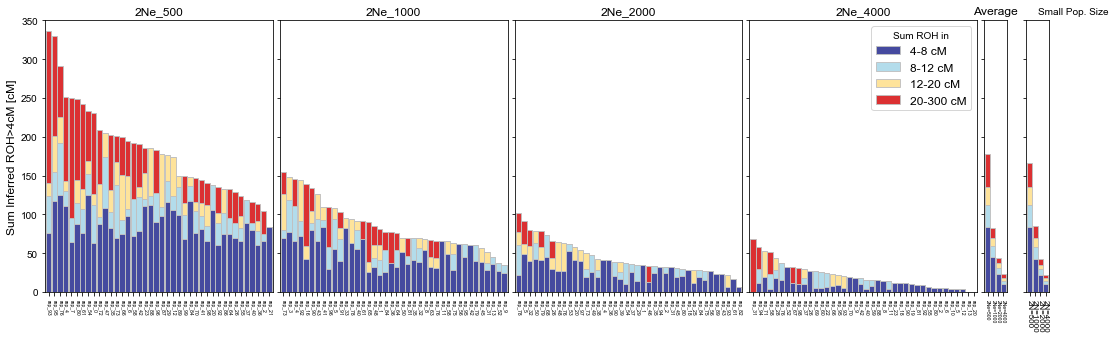

In [13]:
plot_panel_row(df_plots, ylim=[0,350],
               figsize=(18,5), r_title=0, ha_title="center",
               fs_t=12, fs_x=5, fs_y=12, fs_l=12,
               title_col="pop", leg_pos=-2, degrees=[], Ns=[500, 1000, 2000, 4000],
               savepath="./figures/ne_infer/roh_barplot_arg.pdf")

In [5]:
for df in df_all:
    ne = df["pop"].values[0]
    print(f"Ne: {ne}, Inds: {len(df)}")
    print(np.sum(df["sum_roh>20"]>50))

Ne: 2Ne_500, Inds: 100
34
Ne: 2Ne_1000, Inds: 100
8
Ne: 2Ne_2000, Inds: 100
2
Ne: 2Ne_4000, Inds: 100
3


# Ineffective ROH merged

In [39]:
### Load and split up the data
nes = [500, 1000, 2000, 4000]
loadpath = "./Simulated/msprime/fixed_Ne_gaps_merged/combined_roh.tsv"
df1 = pd.read_csv(loadpath, sep="\t")
df_all = [df[df["pop"]==f"2Ne_{ne}"] for ne in nes]

df_samples = [df.sample(n=40).sort_values(by="sum_roh>4", ascending=False) 
                          for df in df_all]

Saved figure to ./figures/ne_infer/roh_barplot.png


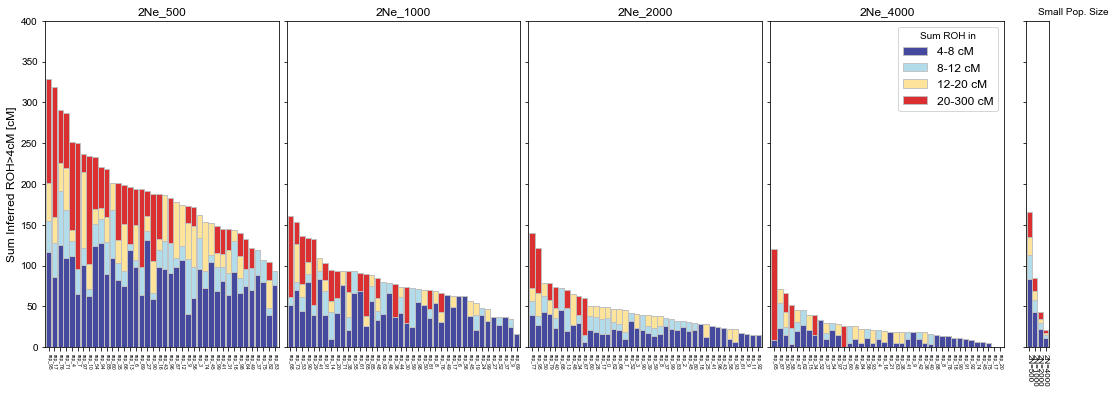

In [40]:
plot_panel_row(df_samples, ylim=[0,400],
               figsize=(18,6), r_title=0, ha_title="center",
               fs_t=12, fs_x=5, fs_y=12, fs_l=12,
               title_col="pop", leg_pos=-1, degrees=[], Ns=[500, 1000, 2000, 4000],
               savepath="./figures/ne_infer/roh_barplot.png")

# Area 51